In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distutils.util import strtobool

/tmp/ipykernel_597866/1854443950.py:3: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.util import strtobool


In [2]:
f = open('time.txt', 'r')
calculs = []
lines = f.readlines()
for line in lines:
    # print(line)
    build, assembly, _, _, _, solve, ndof, ncpus, use_umf = line.split()
    calculs.append({'build': float(build), 'assembly': float(assembly),
                    'solve': float(solve), 'ndof': int(ndof),
                    'ncpus': int(ncpus), 'use_umf': strtobool(use_umf)})


In [3]:
# Différentes valeurs de ncpus et ndofs
cpu_vals = np.zeros(len(calculs), dtype=int)
ndof_vals = np.zeros(len(calculs), dtype=int)
for i, calcul in enumerate(calculs):
    cpu_vals[i] = calcul['ncpus']
    ndof_vals[i] = calcul['ndof']

cpu_vals = np.unique(cpu_vals)
ndof_vals = np.unique(ndof_vals)


In [4]:
cpu_vals

array([ 1,  2,  4,  6,  8, 12, 16, 24, 32, 48])

In [5]:
ndof_vals

array([    12,    144,   1500,  16524, 114444])

12


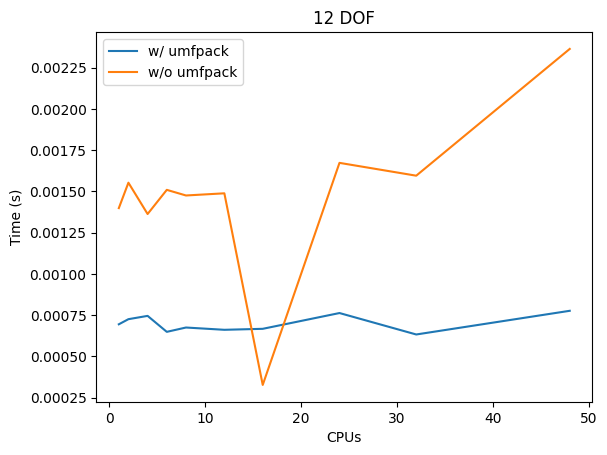

144


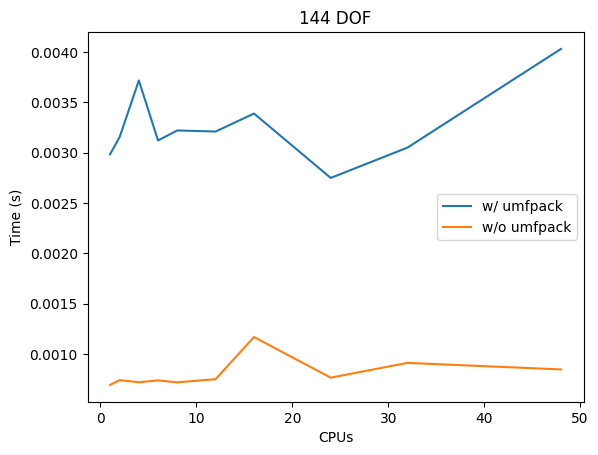

1500


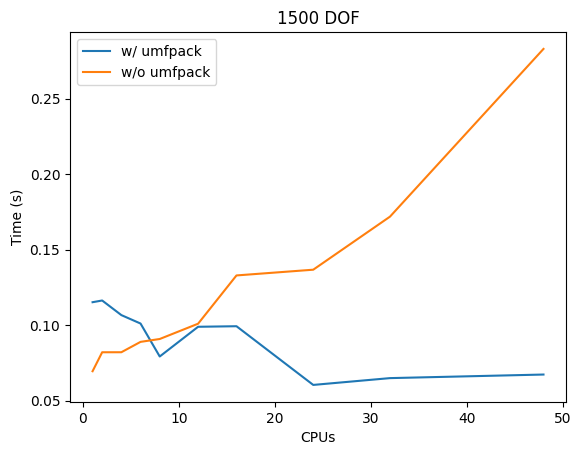

16524


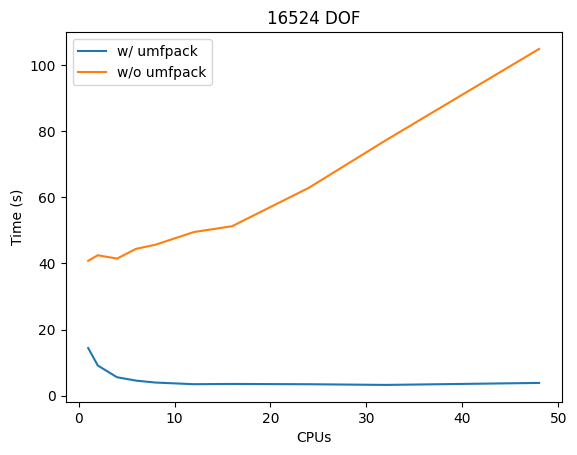

114444


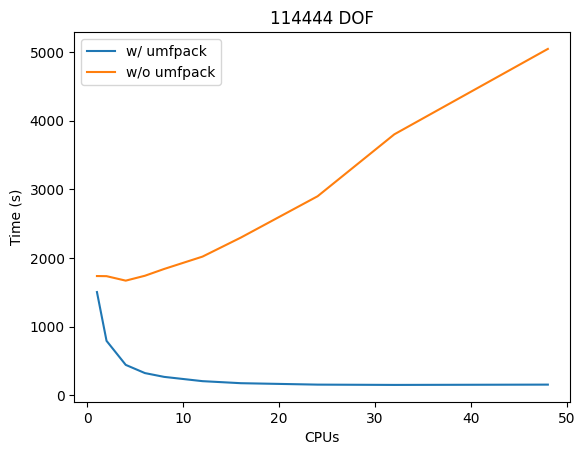

In [6]:
# Tracé Temps calcul avec/sans UMF en fonction du nb de CPUS
# pour chaque taille de problème

for pb_size in ndof_vals:
    print(pb_size)
    # Création d'un nouvelle figure
    with_umf = []
    without_umf = []
    for ncpus in cpu_vals:
        for calcul in calculs:
            if calcul['ndof'] == pb_size and calcul['ncpus'] == ncpus:
                if calcul['use_umf']:
                    with_umf.append(calcul['solve'])
                else:
                    without_umf.append(calcul['solve'])

    plt.plot(cpu_vals, with_umf, label='w/ umfpack')
    plt.plot(cpu_vals, without_umf, label='w/o umfpack')
    plt.title(str(pb_size)+ ' DOF')
    plt.xlabel('CPUs')
    plt.ylabel('Time (s)')
    # plt.xscale('log')
    plt.legend()
    plt.show()





114444


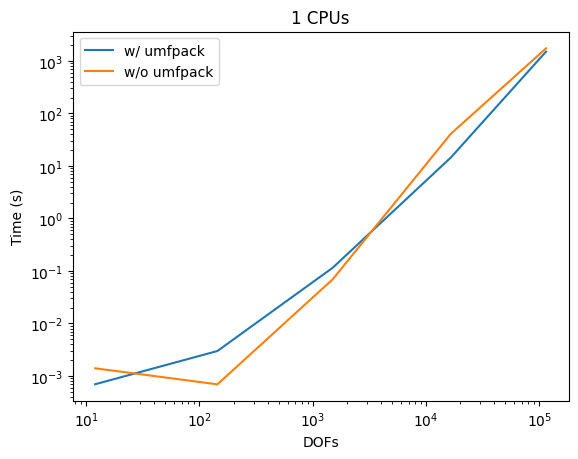

114444


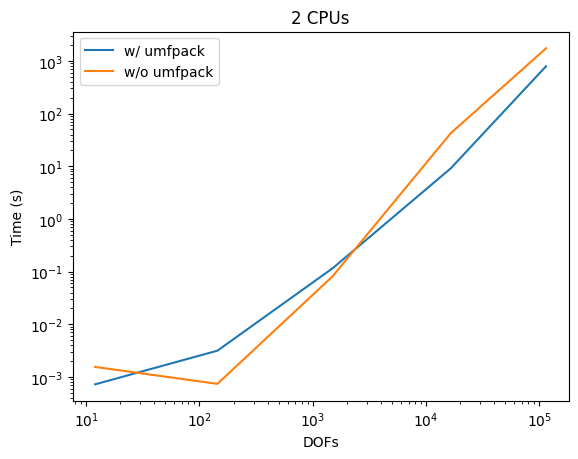

114444


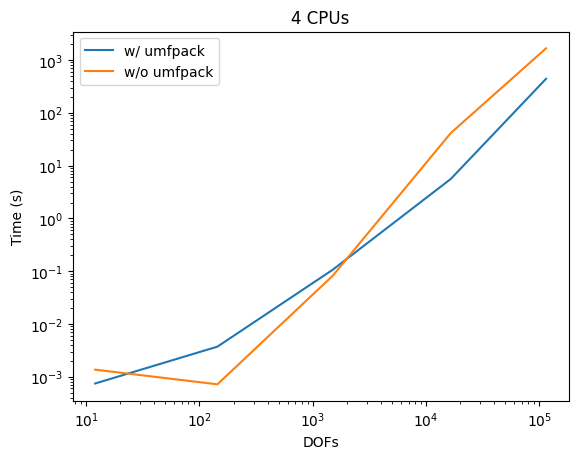

114444


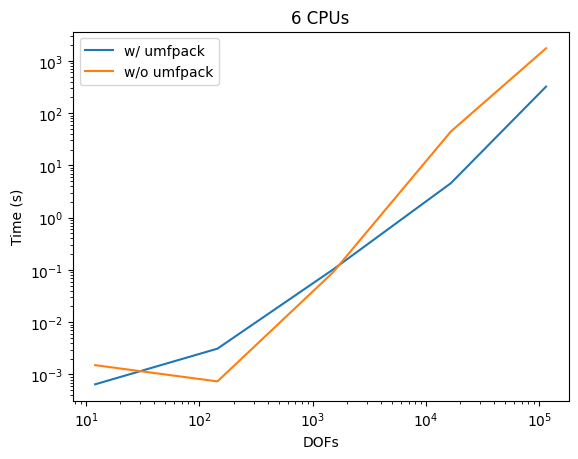

114444


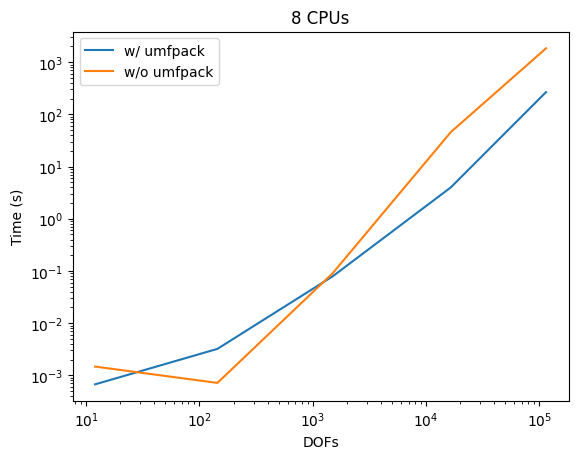

114444


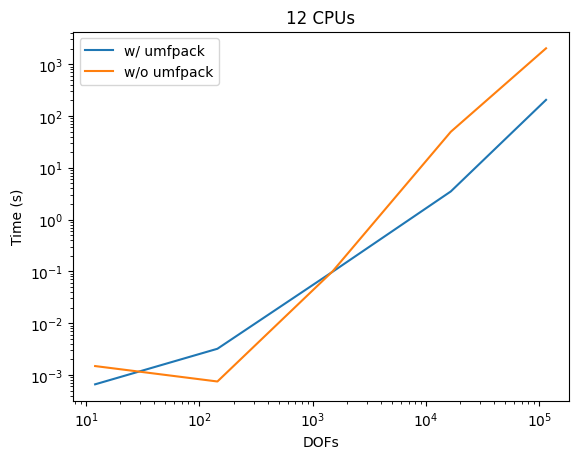

114444


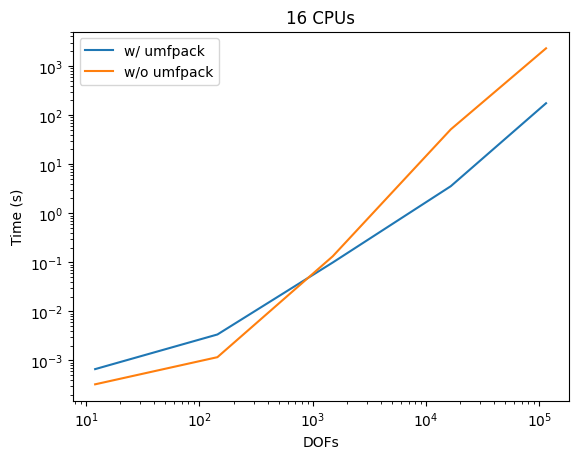

114444


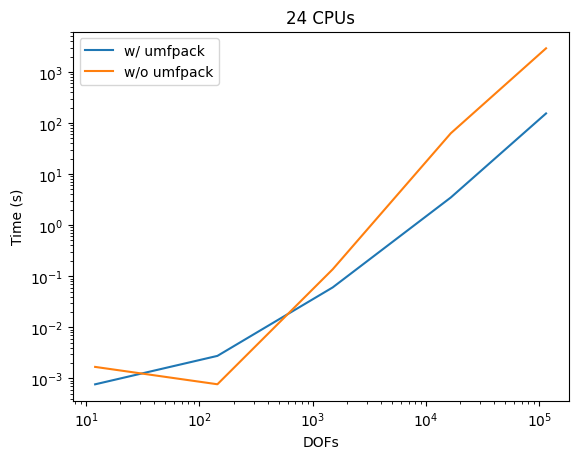

114444


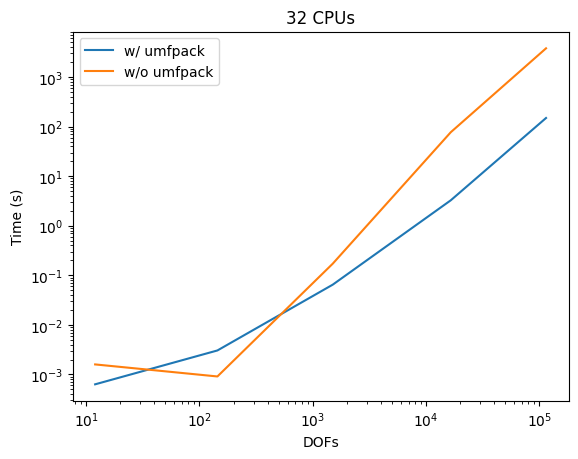

114444


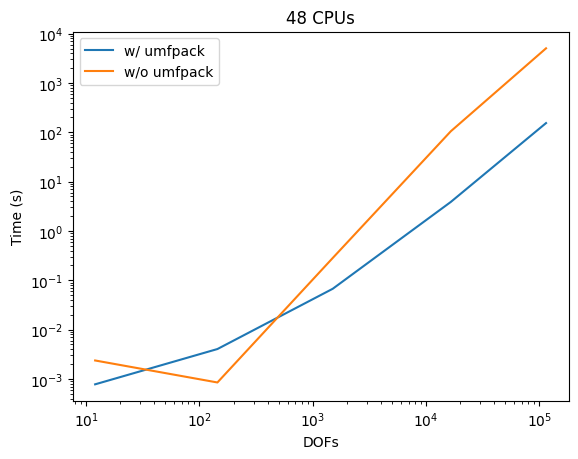

: 

In [8]:
# Temps de calcul en fonction de la taille du pb
# Avec UMF Pack
# 1 tracé pour chaque valeurs de nb cpus

for ncpus in cpu_vals:
    print(pb_size)
    # Création d'un nouvelle figure
    with_umf = []
    without_umf = []
    for pb_size in ndof_vals:
        for calcul in calculs:
            if calcul['ndof'] == pb_size and calcul['ncpus'] == ncpus:
                if calcul['use_umf']:
                    with_umf.append(calcul['solve'])
                else:
                    without_umf.append(calcul['solve'])

    plt.plot(ndof_vals, with_umf, label='w/ umfpack')
    plt.plot(ndof_vals, without_umf, label='w/o umfpack')
    plt.title(str(ncpus)+ ' CPUs')
    plt.xlabel('DOFs')
    plt.ylabel('Time (s)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
